# Etude d'un dataset pour prédire le prix d'une maison

- On va ici essayer de prédire le prix d'une maison en fonction de : 

- id : Identifiant de la vente,

- date : Date de la vente,

- nb_chambres : Nombre de chambres,

- nb_sdb : Nombre de salles de bain, les valeurs 0.5 correspondent aux WC sans douche/baignoire,

- m2_interieur : Surface en m2 de l'espace vivable de la maison,

- m2_jardin : Surface en m2 de l'espace extérieur,

- m2_etage : Surface en m2 des pièces situées au dessus du niveau du sol,

- m2_soussol : Surface en m2 des pièces situées en dessous du niveau du sol,

- nb_etages : Nombre d'étages,

- vue_mer : Variable booléenne indiquant s'il y a une vue sur mer ou non,

- vue_note : Note entre 0 et 4 indiquant la qualité de la vue,

- etat_note : Note de 1 à 5 indiquant l'état de la maison,

- design_note : Note de 1 à 13 indiquant le niveau de design de la maison,

- annee_construction : Année de construction,

- annee_renovation : Dernière année de rénovation s'il y a eu, sinon 0,

- m2_interieur_15voisins : Surface en m2 de l'espace vivable des 15 voisins les plus proches,

- m2_jardin_15voisins : Surface en m2 de l'espace extérieur des 15 voisins les plus proches,

- zipcode : Zipcode de l'adresse de la maison

- lat : latitude,

- long : longitude

question à poser au prof : pour le split train test : il faut séparer les dernieres dates (et donc trier par ordre chronologique) et pas séparer en random si ?

In [2]:
import pandas as pd 
import numpy as np # Pour effectuer des calculs mathématiques
import matplotlib.pyplot as plt # Pour réaliser des graphiques
from sklearn.preprocessing import StandardScaler # Pour la normalisation des données
from sklearn import decomposition # Pour l'ACP

from scipy.cluster.hierarchy import dendrogram # Pour le dendrogramme
from sklearn.preprocessing import StandardScaler # Pour la normalisation des données
from sklearn.cluster import AgglomerativeClustering # Pour la CAH
from sklearn.cluster import KMeans # Pour les K-means

import scipy.stats as scy
from statsmodels.api import OLS
from statsmodels.tools.tools import add_constant

In [3]:
path = "train_data.csv"
data = pd.read_csv(path)
print(data.columns)
data.head()



Index(['id', 'date', 'prix', 'nb_chambres', 'nb_sdb', 'm2_interieur',
       'm2_jardin', 'm2_etage', 'm2_soussol', 'nb_etages', 'vue_mer',
       'vue_note', 'etat_note', 'design_note', 'annee_construction',
       'annee_renovation', 'm2_interieur_15voisins', 'm2_jardin_15voisins',
       'zipcode', 'lat', 'long'],
      dtype='object')


,id,date,prix,nb_chambres,nb_sdb,m2_interieur,m2_jardin,m2_etage,m2_soussol,nb_etages,...,vue_note,etat_note,design_note,annee_construction,annee_renovation,m2_interieur_15voisins,m2_jardin_15voisins,zipcode,lat,long
0,4443800785,2014-11-21T00:00:00Z,481000,2,1.00,150.501672,360.460795,85.470085,65.031587,1.0,...,0,4,7,1924,0,123.560015,360.460795,98117,47.6855,-122.391
1,2722059013,2015-02-04T00:00:00Z,550000,2,1.00,117.985879,4046.822742,117.985879,0.000000,1.0,...,0,4,5,1908,0,173.727239,646.599777,98042,47.3651,-122.165
2,8856004730,2014-09-17T00:00:00Z,199950,2,2.75,147.714604,1943.236715,147.714604,0.000000,1.5,...,0,3,5,1920,0,121.701970,557.413601,98001,47.2786,-122.250
3,2473003210,2015-03-13T00:00:00Z,364808,3,1.75,215.533259,731.605351,150.501672,65.031587,1.0,...,0,3,8,1967,0,184.875511,903.010033,98058,47.4524,-122.146
4,6743700335,2014-06-04T00:00:00Z,470000,3,2.00,167.224080,1176.978818,167.224080,0.000000,1.0,...,0,3,7,1956,1990,183.017466,908.119658,98033,47.6935,-122.173


In [4]:
data['date'] = pd.to_datetime(data['date'], errors='coerce')
data['date'] = data['date'].map(lambda x: str(x).split(' ')[0])

In [5]:
data.shape[1]

21

In [6]:
data.head()

,id,date,prix,nb_chambres,nb_sdb,m2_interieur,m2_jardin,m2_etage,m2_soussol,nb_etages,...,vue_note,etat_note,design_note,annee_construction,annee_renovation,m2_interieur_15voisins,m2_jardin_15voisins,zipcode,lat,long
0,4443800785,2014-11-21,481000,2,1.00,150.501672,360.460795,85.470085,65.031587,1.0,...,0,4,7,1924,0,123.560015,360.460795,98117,47.6855,-122.391
1,2722059013,2015-02-04,550000,2,1.00,117.985879,4046.822742,117.985879,0.000000,1.0,...,0,4,5,1908,0,173.727239,646.599777,98042,47.3651,-122.165
2,8856004730,2014-09-17,199950,2,2.75,147.714604,1943.236715,147.714604,0.000000,1.5,...,0,3,5,1920,0,121.701970,557.413601,98001,47.2786,-122.250
3,2473003210,2015-03-13,364808,3,1.75,215.533259,731.605351,150.501672,65.031587,1.0,...,0,3,8,1967,0,184.875511,903.010033,98058,47.4524,-122.146
4,6743700335,2014-06-04,470000,3,2.00,167.224080,1176.978818,167.224080,0.000000,1.0,...,0,3,7,1956,1990,183.017466,908.119658,98033,47.6935,-122.173


In [7]:
data['year'] = data['date'].map(lambda x: int(x.split('-')[0]))
data['month'] = data['date'].map(lambda x: int(x.split('-')[1]))
data['cos_month'] = data['month'].map(lambda x: np.cos(float(x)))

In [8]:
data.head()

,id,date,prix,nb_chambres,nb_sdb,m2_interieur,m2_jardin,m2_etage,m2_soussol,nb_etages,...,annee_construction,annee_renovation,m2_interieur_15voisins,m2_jardin_15voisins,zipcode,lat,long,year,month,cos_month
0,4443800785,2014-11-21,481000,2,1.00,150.501672,360.460795,85.470085,65.031587,1.0,...,1924,0,123.560015,360.460795,98117,47.6855,-122.391,2014,11,0.004426
1,2722059013,2015-02-04,550000,2,1.00,117.985879,4046.822742,117.985879,0.000000,1.0,...,1908,0,173.727239,646.599777,98042,47.3651,-122.165,2015,2,-0.416147
2,8856004730,2014-09-17,199950,2,2.75,147.714604,1943.236715,147.714604,0.000000,1.5,...,1920,0,121.701970,557.413601,98001,47.2786,-122.250,2014,9,-0.911130
3,2473003210,2015-03-13,364808,3,1.75,215.533259,731.605351,150.501672,65.031587,1.0,...,1967,0,184.875511,903.010033,98058,47.4524,-122.146,2015,3,-0.989992
4,6743700335,2014-06-04,470000,3,2.00,167.224080,1176.978818,167.224080,0.000000,1.0,...,1956,1990,183.017466,908.119658,98033,47.6935,-122.173,2014,6,0.960170


seule la  variable vue_mer est qualitative (0 : pas de vue mer, 1 sinon).

In [9]:
zeros = len(data[data['prix'] == 0])
missed = len(data[data['prix']=='NaN'])
print(zeros, missed)

0 0


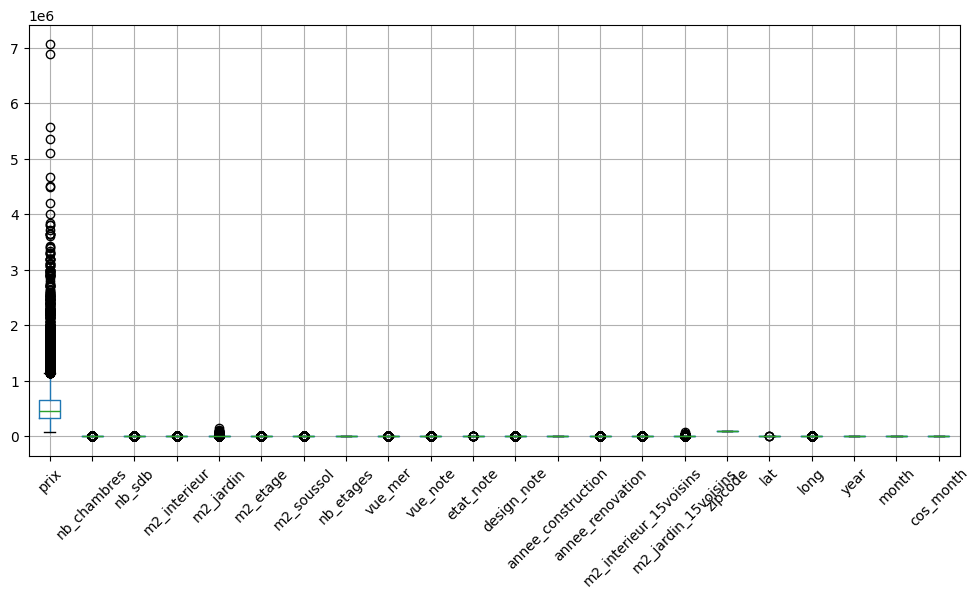

In [10]:
boxplot = data.drop('id',axis = 1).boxplot(figsize=(10,5))
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

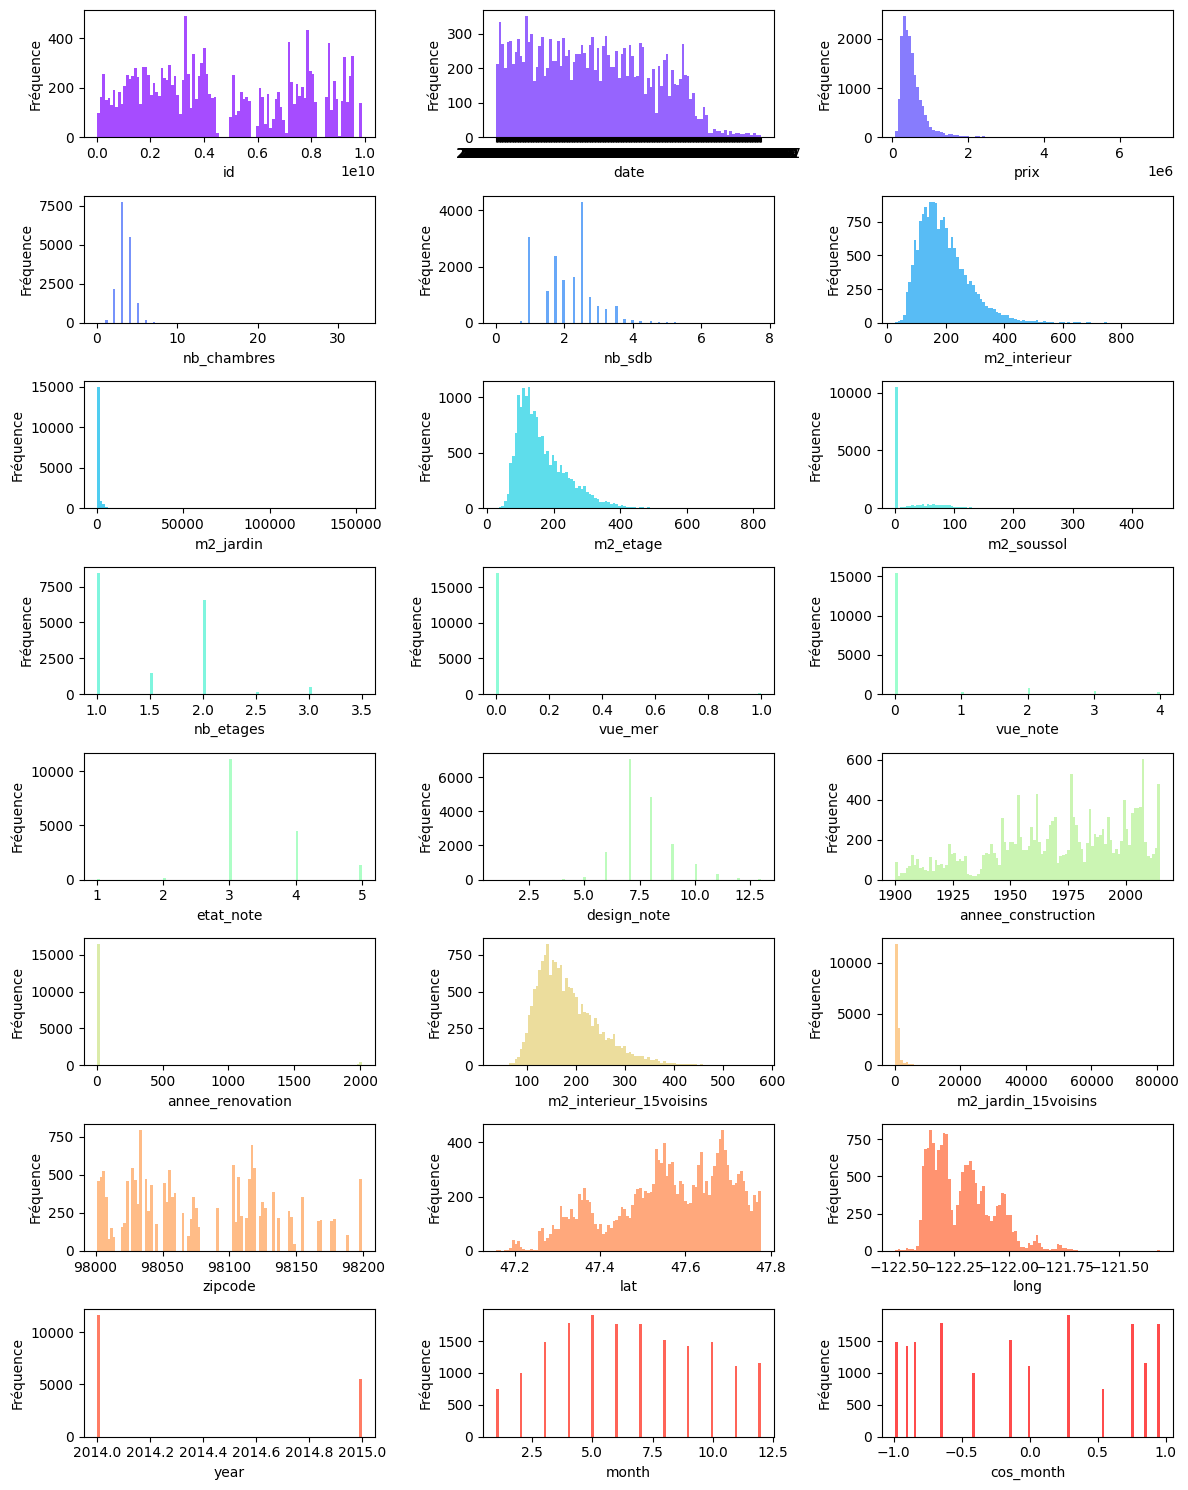

In [12]:
plt.figure(figsize=(12, 15))
columns = data.columns

#for visual purposes, we will use a different color per column, so 20 different colors
colors = plt.cm.rainbow(np.linspace(0, 1, len(columns)))

for i, column in enumerate(columns):
    plt.subplot((len(columns) + 2) // 3, 3, i + 1)  # Calcule le nombre de lignes de sous-graphiques
    plt.hist(data[column], bins=100, alpha=0.7, color=colors[i])
    plt.xlabel(column)
    plt.ylabel('Fréquence')

plt.tight_layout()  # Ajuste les espacements pour éviter le chevauchement
plt.show()


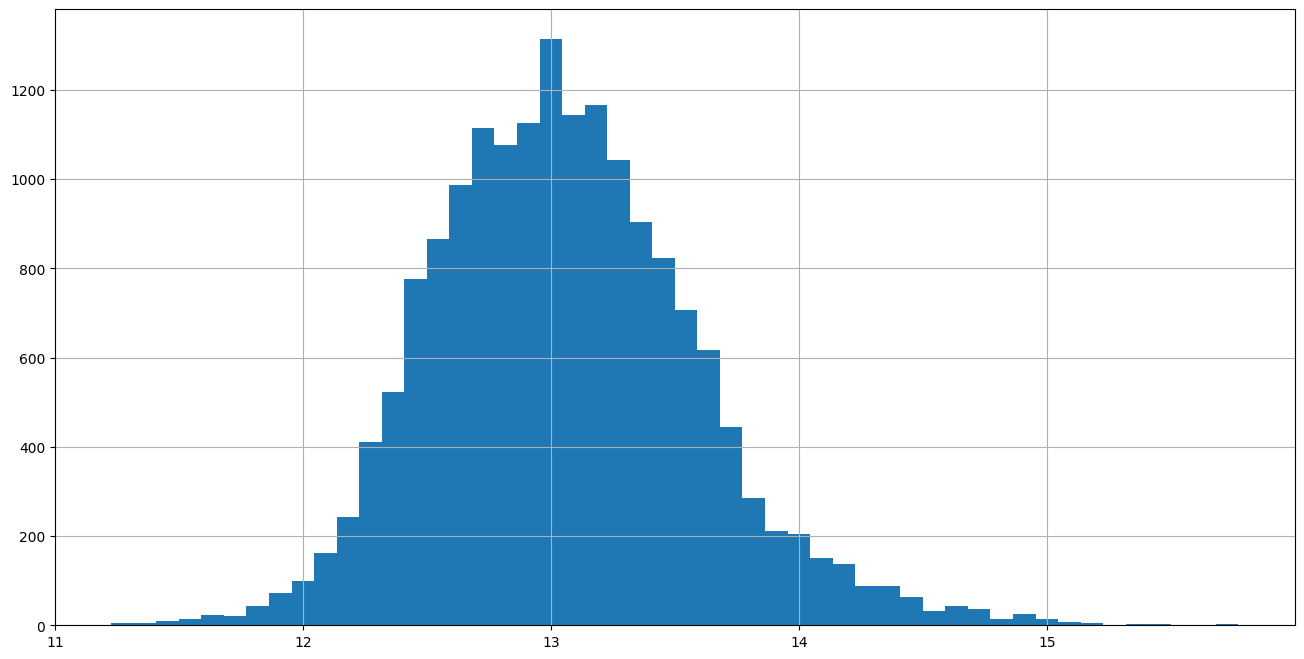

In [13]:
data['prix'].apply(lambda x: np.log(x)).hist(bins=50, figsize=(16, 8))
plt.show()

In [14]:
from pandas.plotting import scatter_matrix
data.describe()

,id,prix,nb_chambres,nb_sdb,m2_interieur,m2_jardin,m2_etage,m2_soussol,nb_etages,vue_mer,...,annee_construction,annee_renovation,m2_interieur_15voisins,m2_jardin_15voisins,zipcode,lat,long,year,month,cos_month
count,1.714700e+04,1.714700e+04,17147.000000,17147.000000,17147.000000,17147.000000,17147.000000,17147.000000,17147.000000,17147.000000,...,17147.000000,17147.000000,17147.000000,17147.000000,17147.000000,17147.000000,17147.000000,17147.000000,17147.000000,17147.000000
mean,4.605475e+09,5.431939e+05,3.371669,2.123010,193.732114,1411.998121,166.652667,27.079448,1.497638,0.008048,...,1971.154721,86.124453,184.852674,1187.418834,98077.654808,47.560131,-122.213735,2014.322389,6.573103,-0.050727
std,2.879726e+09,3.716087e+05,0.932029,0.772906,85.587837,3879.062125,77.312579,41.221029,0.542015,0.089352,...,29.378196,405.556968,64.023277,2504.936376,53.455894,0.138478,0.140614,0.467405,3.106316,0.701442
min,1.000102e+06,7.500000e+04,0.000000,0.000000,26.941657,48.309179,26.941657,0.000000,1.000000,0.000000,...,1900.000000,0.000000,37.068004,61.222594,98001.000000,47.155900,-122.519000,2014.000000,1.000000,-0.989992
25%,2.126059e+09,3.230000e+05,3.000000,1.750000,132.850242,468.227425,111.482720,0.000000,1.000000,0.000000,...,1951.500000,0.000000,138.424378,473.801561,98033.000000,47.472300,-122.328000,2014.000000,4.000000,-0.839072
50%,3.905120e+09,4.500000e+05,3.000000,2.250000,178.372352,706.150130,145.856559,0.000000,1.500000,0.000000,...,1975.000000,0.000000,170.940171,707.822371,98065.000000,47.572000,-122.230000,2014.000000,6.000000,-0.145500
75%,7.339452e+09,6.460000e+05,4.000000,2.500000,236.900780,992.985879,206.243032,52.025269,2.000000,0.000000,...,1997.000000,0.000000,219.249350,936.780007,98117.000000,47.678100,-122.124500,2015.000000,9.000000,0.753902
max,9.900000e+09,7.062500e+06,33.000000,7.750000,932.738759,153414.994426,823.114084,447.788926,3.500000,1.000000,...,2015.000000,2015.000000,576.923077,80936.454849,98199.000000,47.777600,-121.315000,2015.000000,12.000000,0.960170


In [15]:
data = data.dropna(axis=0, how='any', inplace=False)


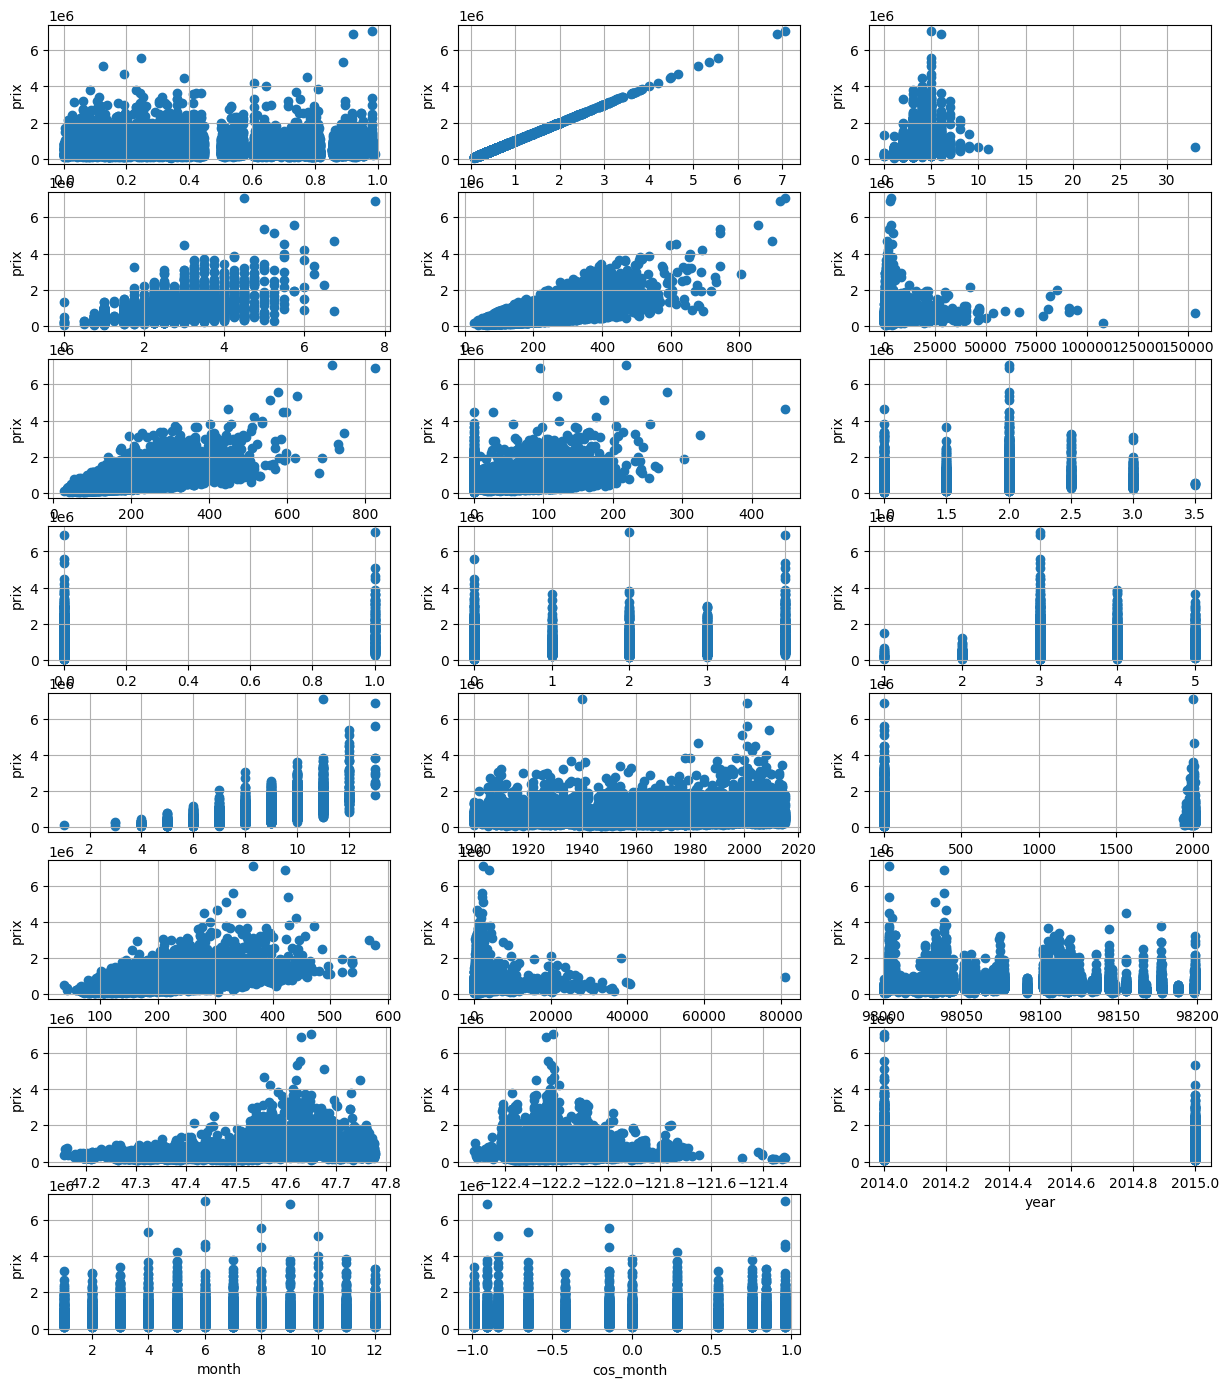

In [ ]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns


plt.figure(figsize=(15, 17))
for i, column in enumerate(numerical_columns):
    plt.subplot((len(numerical_columns) + 2) // 3, 3, i + 1)  # Calcule le nombre de lignes de sous-graphiques
    if data[column].dtype in ['int64', 'float64']:
      plt.scatter(data[column],data['prix'], color=colors[i])
      plt.grid()
      plt.xlabel(column)
      plt.ylabel('prix')
plt.show()


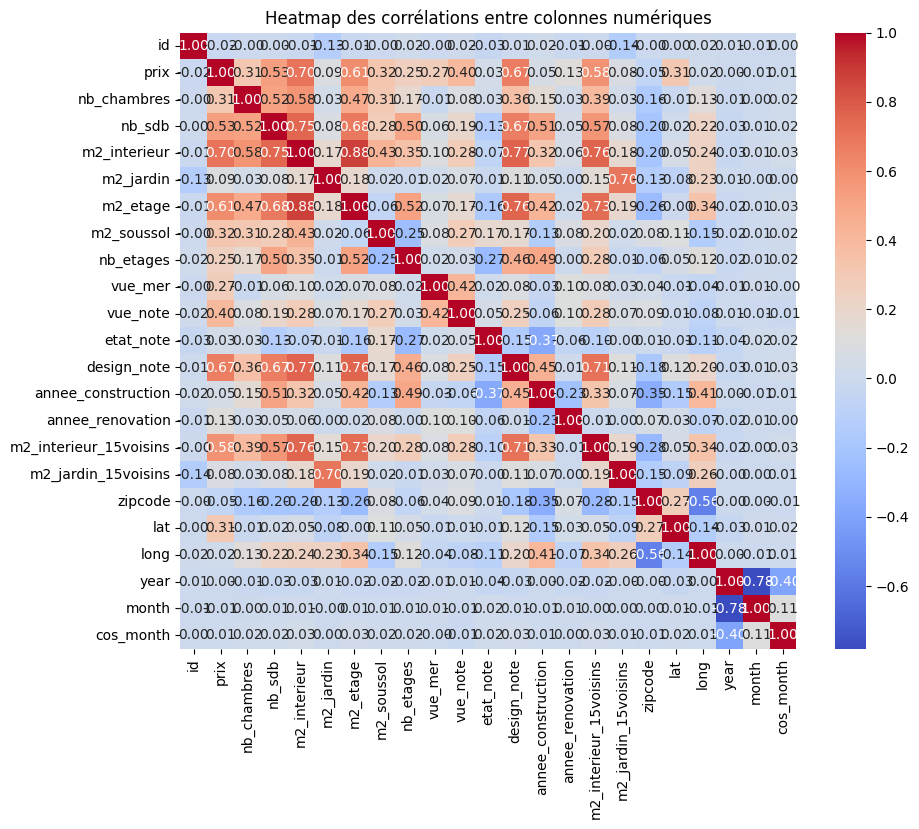

In [36]:
import seaborn as sns

# Calculer la matrice de corrélation
correlation_matrix = data[numerical_columns].corr()  # Calcul des corrélations

# Créer une heatmap
plt.figure(figsize=(10, 8))  # Taille de la figure
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Heatmap des corrélations entre colonnes numériques")
plt.show()

In [37]:

from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

def ACP_fonc(data_acp,
             inerties='non', n_cp=10, ech_iner_x=6, ech_iner_y=4,
             cercle='non', ech_cer=8,
             projection='non', label_indiv='non', ech_pr_x=5, ech_pr_y=4,
             cp_x=1, cp_y=2):

    n = data_acp.shape[0]
    p = data_acp.shape[1]
    n_cp = min(n_cp, p)

    norm = StandardScaler(with_mean=True, with_std=True)
    data_acp_norm = norm.fit_transform(data_acp)

    acp_model = decomposition.PCA(svd_solver='full')
    acp_out = acp_model.fit(data_acp_norm)

    val_prop = (n-1)/n * acp_out.explained_variance_
    part_inertie_expl = acp_out.explained_variance_ratio_

    print(f"val_prop shape: {val_prop.shape}")
    print(f"part_inertie_expl shape: {part_inertie_expl.shape}")

    if inerties == 'oui':
        plt.subplots(figsize=(ech_iner_x, ech_iner_y))
        plt.bar(np.arange(1, n_cp+1), val_prop[:n_cp])
        plt.title('Eboulis des valeurs propres')
        plt.xlabel('Composante principale')
        plt.ylabel('Valeur propre')
        plt.show()

        plt.subplots(figsize=(ech_iner_x, ech_iner_y))
        plt.bar(np.arange(1, n_cp+1), val_prop[:n_cp]/np.sum(val_prop)*100)
        plt.title("Part d'inertie expliquée (%)")
        plt.xlabel('Composante principale')
        plt.ylabel('Pourcentage')
        plt.show()

        plt.subplots(figsize=(ech_iner_x, ech_iner_y))
        plt.bar(np.arange(1, n_cp+1), np.cumsum(part_inertie_expl[:n_cp])*100)
        plt.title("Part d'inertie expliquée cumulée (%)")
        plt.xlabel('Nombre de composantes principales')
        plt.ylabel('Pourcentage')
        plt.show()

    coord = acp_out.fit_transform(data_acp_norm)
    data_acp_out = data_acp.copy()

    for i in range(p):
        data_acp_out['CP_'+str(i+1)] = coord[:,i]

    cos2 = coord**2
    for i in range(p):
        data_acp_out['Cos2_'+str(i+1)] = cos2[:,i] / np.sum(data_acp_norm**2,axis=1)

    ctr = coord**2
    for i in range(p):
        data_acp_out['CTR_'+str(i+1)] = ctr[:,i] / (n*val_prop[i])

    if cercle == 'oui':
        cor_var = np.zeros((p, p))
        for i in range(p):
            cor_var[:,i] = acp_out.components_[i,:] * np.sqrt((n-1)/n * acp_out.explained_variance_)[i]
        an = np.linspace(0, 2*np.pi, 100)
        fig, ax = plt.subplots(figsize=(ech_cer, ech_cer))
        for i in range(p):
            ax.arrow(0,
                     0,
                     cor_var[i, cp_x-1],
                     cor_var[i, cp_y-1],
                     head_width=0.03,
                     head_length=0.03,
                     length_includes_head=True)
            ax.text(cor_var[i, cp_x-1]+0.01,
                     cor_var[i, cp_y-1],
                     data_acp.columns.values[i],
                     c='red')
        ax.plot(np.cos(an), np.sin(an))
        ax.axhline(y=0)
        ax.axvline(x=0)
        ax.axis('equal')
        ax.set_xlabel('CP {}'.format(cp_x))
        ax.set_ylabel('CP {}'.format(cp_y))
        ax.set_title('Cercle de corrélations')
        plt.show()

    if projection == 'oui':
        fig, ax = plt.subplots(figsize=(2*ech_pr_x, 2*ech_pr_y))
        ax.set_xlim(-ech_pr_x, ech_pr_y)
        ax.set_ylim(-ech_pr_x, ech_pr_y)
        ax.scatter(data_acp_out['CP_'+str(cp_x)], data_acp_out['CP_'+str(cp_y)], s=40)
        ax.axhline(y=0)
        ax.axvline(x=0)
        ax.set_xlabel('CP {}'.format(cp_x))
        ax.set_ylabel('CP {}'.format(cp_y))
        ax.set_title('Projection des individus')
        if label_indiv == 'oui':
            for i in range(n):
                ax.annotate(data_acp.index[i], (data_acp_out['CP_'+str(cp_x)].iloc[i]+0.1, data_acp_out['CP_'+str(cp_y)].iloc[i]+0.1))
        plt.show()

    return acp_out, data_acp_out

In [38]:
data_acp = data[numerical_columns].drop(['prix','id'],axis=1)



val_prop shape: (21,)
part_inertie_expl shape: (21,)
PCA(svd_solver='full')        nb_chambres  nb_sdb  m2_interieur    m2_jardin    m2_etage  m2_soussol  \
0                2    1.00    150.501672   360.460795   85.470085   65.031587   
1                2    1.00    117.985879  4046.822742  117.985879    0.000000   
2                2    2.75    147.714604  1943.236715  147.714604    0.000000   
3                3    1.75    215.533259   731.605351  150.501672   65.031587   
4                3    2.00    167.224080  1176.978818  167.224080    0.000000   
...            ...     ...           ...          ...         ...         ...   
17142            4    2.75    267.558528   371.609067  195.094760   72.463768   
17143            3    1.75    143.069491   979.654404  143.069491    0.000000   
17144            3    1.75    148.643627   671.869194  148.643627    0.000000   
17145            4    2.50    189.520624  2023.504274  189.520624    0.000000   
17146            1    0.75     78

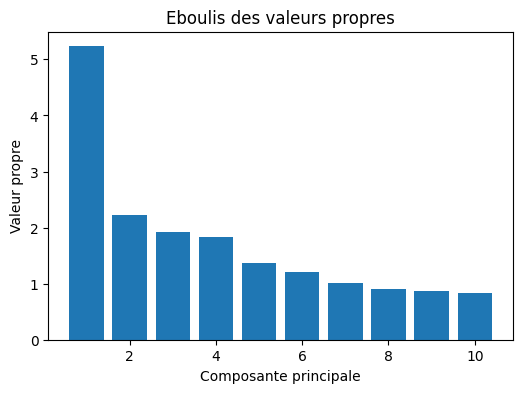

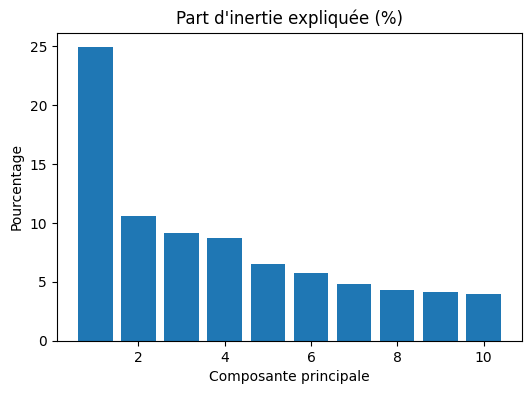

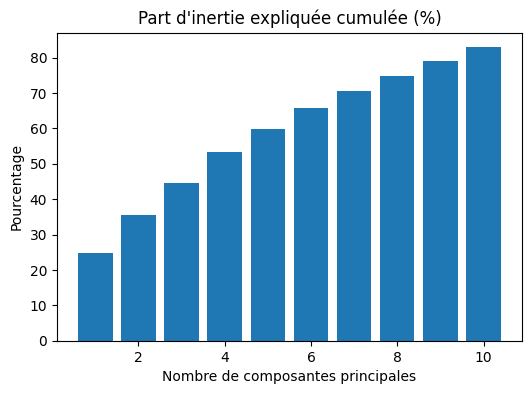

(PCA(svd_solver='full'),
        nb_chambres  nb_sdb  m2_interieur    m2_jardin    m2_etage  m2_soussol  \
 0                2    1.00    150.501672   360.460795   85.470085   65.031587   
 1                2    1.00    117.985879  4046.822742  117.985879    0.000000   
 2                2    2.75    147.714604  1943.236715  147.714604    0.000000   
 3                3    1.75    215.533259   731.605351  150.501672   65.031587   
 4                3    2.00    167.224080  1176.978818  167.224080    0.000000   
 ...            ...     ...           ...          ...         ...         ...   
 17142            4    2.75    267.558528   371.609067  195.094760   72.463768   
 17143            3    1.75    143.069491   979.654404  143.069491    0.000000   
 17144            3    1.75    148.643627   671.869194  148.643627    0.000000   
 17145            4    2.50    189.520624  2023.504274  189.520624    0.000000   
 17146            1    0.75     78.966927   520.252694   78.966927    0.0

In [39]:
acp_out, data_acp_out = ACP_fonc(data_acp=data_acp)
print(acp_out, data_acp_out)
ACP_fonc(data_acp = data_acp, inerties='oui')

val_prop shape: (21,)
part_inertie_expl shape: (21,)


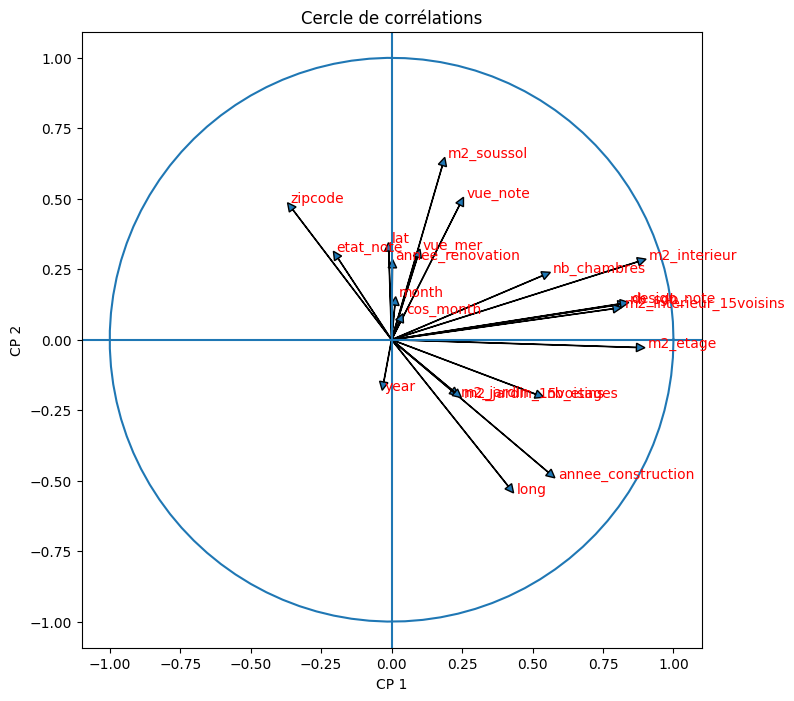

In [40]:
ACP_fonc(data_acp = data_acp, cercle='oui', cp_x=1, cp_y=2);

val_prop shape: (21,)
part_inertie_expl shape: (21,)


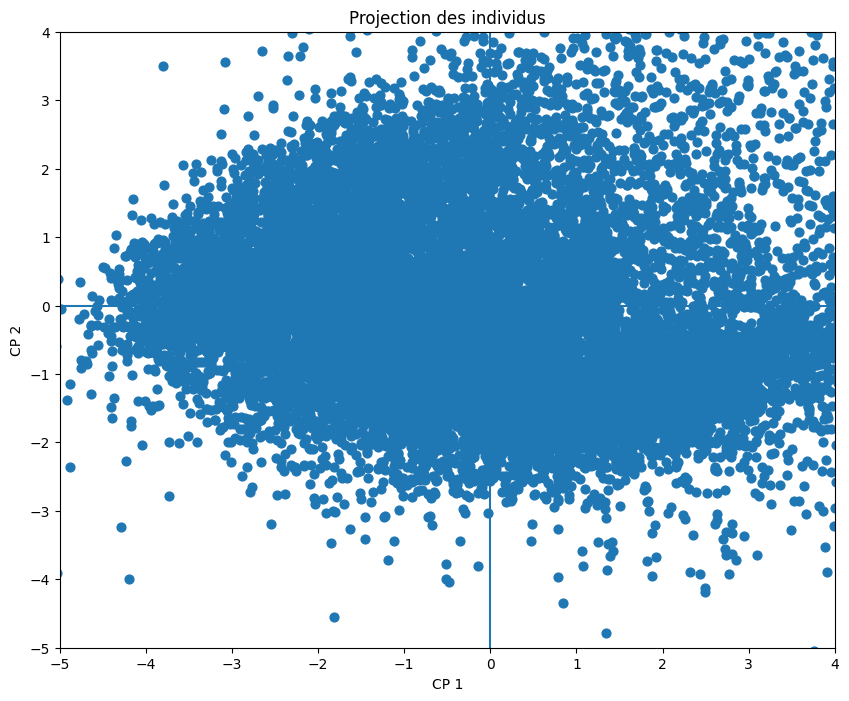

In [41]:
ACP_fonc(data_acp=data_acp, projection='oui', cp_x=1, cp_y=2);

In [82]:
data = data.sort_values(by='date',axis = 0)


In [90]:
data.head()

,id,date,prix,nb_chambres,nb_sdb,m2_interieur,m2_jardin,m2_etage,m2_soussol,nb_etages,...,annee_construction,annee_renovation,m2_interieur_15voisins,m2_jardin_15voisins,zipcode,lat,long,year,month,cos_month
6187,1999700045,2014-05-02,313000,3,1.50,124.489038,735.042735,124.489038,0.000000,1.5,...,1955,0,137.495355,737.643999,98133,47.7658,-122.339,2014,5,0.283662
5983,9294300070,2014-05-02,650000,4,2.00,169.082126,464.511334,152.359718,16.722408,1.5,...,1945,0,191.378670,464.511334,98115,47.6815,-122.269,2014,5,0.283662
10815,7305300695,2014-05-02,625000,4,2.50,261.984392,781.122259,261.984392,0.000000,2.0,...,2014,0,120.772947,781.122259,98155,47.7538,-122.325,2014,5,0.283662
14050,1818800144,2014-05-02,750000,3,2.50,222.036418,608.509848,133.779264,88.257153,1.0,...,1955,0,186.733556,608.509848,98116,47.5714,-122.408,2014,5,0.283662
3042,5561000190,2014-05-02,437500,3,2.25,183.017466,3260.869565,183.017466,0.000000,2.0,...,1977,0,217.391304,3260.869565,98027,47.4635,-121.991,2014,5,0.283662


In [92]:
var_y = 'prix'
y = data[var_y]

X = data.drop(['prix','id','date'],axis=1)
var_X = data_acp.columns

In [96]:
linreg_comp_model = OLS(y, add_constant(X))
linreg_comp = linreg_comp_model.fit()
linreg_comp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   prix   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     2033.
Date:                Thu, 13 Mar 2025   Prob (F-statistic):               0.00
Time:                        10:54:15   Log-Likelihood:            -2.3382e+05
No. Observations:               17147   AIC:                         4.677e+05
Df Residuals:                   17126   BIC:                         4.679e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -5.912e+07   1.28e+07     -4.622      0.000   -8.42e+07   -3.41e+07
nb_chambres            -3.442e+04   2132.381    -16.140      0.000   -3.86e+04   -3.02e+04
nb_sdb                  4.152e+04   3664.890     11.329      0.000    3.43e+04    4.87e+04
m2_interieur            1197.1212     27.643     43.306      0.000    1142.938    1251.304
m2_jardin                  1.5087      0.563      2.677      0.007       0.404       2.613
m2_etage                 770.3529     27.198     28.323      0.000     717.041     823.665
m2_soussol               426.7743     32.085     13.302      0.000     363.885     489.663
nb_etages               4204.8233   4049.592      1.038      0.299   -3732.792    1.21e+04
vue_mer                 5.544e+05   1.91e+04     28.976      0.000    5.17e+05    5.92e+05
vue_note                5.427e+04   2425.048     22.381      0.000    4.95e+04     5.9e+04
etat_note               2.845e+04   2670.387     10.654      0.000    2.32e+04    3.37e+04
design_note             9.915e+04   2424.201     40.898      0.000    9.44e+04    1.04e+05
annee_construction     -2610.9531     82.185    -31.769      0.000   -2772.045   -2449.861
annee_renovation          18.3358      4.101      4.471      0.000      10.298      26.374
m2_interieur_15voisins   196.2713     41.836      4.691      0.000     114.268     278.275
m2_jardin_15voisins       -4.4164      0.879     -5.025      0.000      -6.139      -2.694
zipcode                 -606.0231     37.277    -16.257      0.000    -679.090    -532.956
lat                     6.169e+05   1.21e+04     50.799      0.000    5.93e+05    6.41e+05
long                   -2.224e+05   1.49e+04    -14.947      0.000   -2.52e+05   -1.93e+05
year                      3.3e+04   6121.183      5.390      0.000     2.1e+04     4.5e+04
month                   1009.1466    850.050      1.187      0.235    -657.039    2675.332
cos_month              -1347.0438   2557.224     -0.527      0.598   -6359.465    3665.377
==============================================================================
Omnibus:                    13911.644   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1132512.429
Skew:                           3.365   Prob(JB):                         0.00
Kurtosis:                      42.241   Cond. No.                     1.49e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.46e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [97]:
var_X_select = var_X
X_select = data[var_X_select]
len(var_X)

21

In [98]:
var_eliminees = []
while linreg_comp.pvalues.drop('const', errors='ignore').max() > 0.05:
    # on détermine la variable avec la p-value la plus élevée, sauf 'const'
    var_a_eliminer = linreg_comp.pvalues.drop('const', errors='ignore').idxmax()
    var_eliminees.append(var_a_eliminer)
    # Suppression de cette variable de var_X
    var_X_select = [var for var in var_X_select if var != var_a_eliminer]

    # mise à jour X avec les variables restantes
    X_select = data[var_X_select]

    # on redétermine la nouvelle régression linéaire
    linreg_comp_model = OLS(y, add_constant(X_select))
    linreg_comp = linreg_comp_model.fit()

linreg_select_model = OLS(y, add_constant(X_select))
linreg_select = linreg_select_model.fit()
linreg_select.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   prix   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     2391.
Date:                Thu, 13 Mar 2025   Prob (F-statistic):               0.00
Time:                        10:54:21   Log-Likelihood:            -2.3383e+05
No. Observations:               17147   AIC:                         4.677e+05
Df Residuals:                   17129   BIC:                         4.678e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -5.064e+07   7.46e+06     -6.791      0.000   -6.53e+07    -3.6e+07
nb_chambres            -3.448e+04   2131.940    -16.172      0.000   -3.87e+04   -3.03e+04
nb_sdb                  4.253e+04   3534.759     12.031      0.000    3.56e+04    4.95e+04
m2_interieur            1193.7589     27.426     43.527      0.000    1140.002    1247.516
m2_jardin                  1.4944      0.563      2.653      0.008       0.390       2.599
m2_etage                 780.8474     25.349     30.804      0.000     731.161     830.534
m2_soussol               412.9123     29.202     14.140      0.000     355.673     470.152
vue_mer                 5.547e+05   1.91e+04     28.996      0.000    5.17e+05    5.92e+05
vue_note                5.434e+04   2424.269     22.413      0.000    4.96e+04    5.91e+04
etat_note                2.82e+04   2665.328     10.581      0.000     2.3e+04    3.34e+04
design_note             9.933e+04   2413.642     41.155      0.000    9.46e+04    1.04e+05
annee_construction     -2592.7781     80.152    -32.348      0.000   -2749.883   -2435.673
annee_renovation          18.5166      4.094      4.523      0.000      10.493      26.541
m2_interieur_15voisins   191.0158     41.606      4.591      0.000     109.464     272.568
m2_jardin_15voisins       -4.4374      0.879     -5.051      0.000      -6.159      -2.715
zipcode                 -602.8698     37.104    -16.248      0.000    -675.598    -530.142
lat                     6.178e+05   1.21e+04     51.044      0.000    5.94e+05    6.42e+05
long                    -2.24e+05   1.48e+04    -15.119      0.000   -2.53e+05   -1.95e+05
year                     2.85e+04   3316.578      8.593      0.000     2.2e+04     3.5e+04
==============================================================================
Omnibus:                    13884.557   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1123971.968
Skew:                           3.356   Prob(JB):                         0.00
Kurtosis:                      42.091   Cond. No.                     1.50e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.33e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [99]:
print(var_eliminees)

['cos_month', 'nb_etages', 'month']


In [73]:
print(len(var_X_select))

18


In [74]:
import numpy as np # Pour les calculs mathématiques
import matplotlib.pyplot as plt # Pour les graphiques
import pandas as pd # Pour la manipulation de tableaux de données

import scipy.stats as scy # Pour les lois de probabilités et des tests statistiques

from statsmodels.api import OLS # Pour la régression linéaire (avec statsmodels)
from statsmodels.stats.outliers_influence import variance_inflation_factor # Pour les VIF
from statsmodels.tools.tools import add_constant # Pour l'ajout d'une constante dans statsmodels
from statsmodels.stats.api import het_breuschpagan # Pour le test de Breusch-Pagan

from sklearn.linear_model import LinearRegression # Pour la régression linéaire (avec sklearn)
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error # Pour les critères d'erreur

import itertools

def AIC_BIC_linreg(X, y, features):
    linreg_model = OLS(y, X[list(features)])
    linreg = linreg_model.fit()
    AIC = linreg.aic
    BIC = linreg.bic
    return {'model':linreg, 'AIC':AIC, 'BIC':BIC}

def linreg_forward_predictors(X, y, predictors, crit='BIC', verbose=True):
    results=[]
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]

    for p in remaining_predictors:
        results.append(AIC_BIC_linreg(X=X, y=y, features=predictors+[p]+['const']))
    models = pd.DataFrame(results)

    if crit == 'AIC':
        best_model = models.loc[models['AIC'].argmin()]
    else:
        best_model = models.loc[models['BIC'].argmin()]

    if verbose == True:
        print('Selected predictors:', best_model['model'].model.exog_names, 'AIC:', best_model['model'].aic, 'BIC:', best_model['model'].bic)

    return best_model

def linreg_forward_proc(X, y, crit='BIC', verbose=True):
    forward_models = pd.DataFrame(columns=['AIC', 'BIC', 'model'])
    predictors = []

    for i in range(1, len(X.columns.difference(['const'])) + 1):
        forward_result = linreg_forward_predictors(X=X, y=y, predictors=predictors, crit=crit, verbose=verbose)
        if i > 1:
            if forward_result[crit] > forward_model_before:
                break
        forward_models.loc[i] = forward_result
        predictors = forward_models.loc[i]['model'].model.exog_names
        forward_model_before = forward_models.loc[i][crit]
        predictors = [k for k in predictors if k != 'const']

    return(forward_models['model'][len(forward_models['model'])])

In [75]:
linreg_forward = linreg_forward_proc(add_constant(X_comp), y, crit='BIC', verbose=True)

Selected predictors: ['m2_interieur', 'const'] AIC: 476802.6705204416 BIC: 476818.16967746196
Selected predictors: ['m2_interieur', 'lat', 'const'] AIC: 474074.2442965904 BIC: 474097.4930321209
Selected predictors: ['m2_interieur', 'lat', 'vue_note', 'const'] AIC: 472214.97895720147 BIC: 472245.9772712422
Selected predictors: ['m2_interieur', 'lat', 'vue_note', 'design_note', 'const'] AIC: 470970.80496929644 BIC: 471009.55286184733
Selected predictors: ['m2_interieur', 'lat', 'vue_note', 'design_note', 'annee_construction', 'const'] AIC: 469462.6556527066 BIC: 469509.1531237677
Selected predictors: ['m2_interieur', 'lat', 'vue_note', 'design_note', 'annee_construction', 'vue_mer', 'const'] AIC: 468607.43100448605 BIC: 468661.6780540573
Selected predictors: ['m2_interieur', 'lat', 'vue_note', 'design_note', 'annee_construction', 'vue_mer', 'nb_chambres', 'const'] AIC: 468464.4930357877 BIC: 468526.48966386914
Selected predictors: ['m2_interieur', 'lat', 'vue_note', 'design_note', 'annee

In [77]:
print('Covariables issues de la sélection forward :', linreg_forward.model.exog_names)
print('Nombre de covariables issues de la sélection forward :', linreg_forward.params.shape[0])
print('BIC de la régression linéaire avec sélection forward :', round(linreg_forward.bic, ndigits=1))

Covariables issues de la sélection forward : ['m2_interieur', 'lat', 'vue_note', 'design_note', 'annee_construction', 'vue_mer', 'nb_chambres', 'nb_sdb', 'zipcode', 'long', 'etat_note', 'year', 'm2_etage', 'm2_jardin_15voisins', 'annee_renovation', 'm2_interieur_15voisins', 'const']
Nombre de covariables issues de la sélection forward : 17
BIC de la régression linéaire avec sélection forward : 467824.1


In [78]:
RMSE = 0
MAPE = 0
for i in range(100) :
  train = np.random.binomial(n=1, p=0.2, size=data.shape[0])

  X_train = X[train == 0]  # toutes les variables : on entraîne le modèle (*) sur toutes les variables
  y_train = y[train == 0]

  X_test = X[train == 1]
  y_test = y[train == 1]

  reg = LinearRegression().fit(X_train, y_train)

  RMSE += np.sqrt(mean_squared_error(y_test, reg.predict(X_test)))
  #print('RMSE :', round(RMSE, ndigits=2))

  MAPE += mean_absolute_percentage_error(y_test, reg.predict(X_test)) * 100
  #print('MAPE :', round(MAPE, ndigits=2))

RMSE = RMSE/100
print('RMSE :', round(RMSE, ndigits=4))

MAPE = MAPE/100
print('MAPE :', round(MAPE, ndigits=2))

RMSE : 202222.6635
MAPE : 25.71


In [79]:
X = add_constant(X_select)

VIF = pd.DataFrame()
VIF['Variables'] = X.columns
VIF['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(VIF[1:len(X.columns)])

C:\Users\rapha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                 Variables       VIF
1              nb_chambres  1.652143
2                   nb_sdb  3.123283
3             m2_interieur       inf
4                m2_jardin  1.997971
5                 m2_etage       inf
6               m2_soussol       inf
7                  vue_mer  1.222762
8                 vue_note  1.448925
9                etat_note  1.254138
10             design_note  3.405244
11      annee_construction  2.320133
12        annee_renovation  1.153372
13  m2_interieur_15voisins  2.969095
14     m2_jardin_15voisins  2.026363
15                 zipcode  1.646173
16                     lat  1.175371
17                    long  1.816555
18                    year  1.005553


In [80]:
X = X_select.drop(['m2_soussol','m2_etage'],axis = 1)


In [81]:
RMSE = 0
MAPE = 0
for i in range(100) :
  train = np.random.binomial(n=1, p=0.2, size=data.shape[0])

  X_train = X[train == 0]  # toutes les variables : on entraîne le modèle (*) sur toutes les variables
  y_train = y[train == 0]

  X_test = X[train == 1]
  y_test = y[train == 1]

  reg = LinearRegression().fit(X_train, y_train)

  RMSE += np.sqrt(mean_squared_error(y_test, reg.predict(X_test)))
  #print('RMSE :', round(RMSE, ndigits=2))

  MAPE += mean_absolute_percentage_error(y_test, reg.predict(X_test)) * 100
  #print('MAPE :', round(MAPE, ndigits=2))

RMSE = RMSE/100
print('RMSE :', round(RMSE, ndigits=4))

MAPE = MAPE/100
print('MAPE :', round(MAPE, ndigits=2))

RMSE : 205132.0914
MAPE : 25.84


mape = 26

In [55]:

X = add_constant(X)

VIF = pd.DataFrame()
VIF['Variables'] = X.columns
VIF['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(VIF[1:len(X.columns)])

                 Variables       VIF
1              nb_chambres  1.650694
2                   nb_sdb  3.117344
3             m2_interieur  5.051335
4                m2_jardin  1.996433
5                  vue_mer  1.220691
6                 vue_note  1.408714
7                etat_note  1.237076
8              design_note  3.262743
9       annee_construction  2.301348
10        annee_renovation  1.153287
11  m2_interieur_15voisins  2.934267
12     m2_jardin_15voisins  2.026238
13                 zipcode  1.645534
14                     lat  1.165616
15                    long  1.773978
16                    year  1.005553


In [56]:
X_mlp = data.drop(columns = ['prix', 'id'])

In [57]:
Y_mlp = data['prix']

In [ ]:
X_mlp_onehot = pd.get_dummies(X_mlp, columns=['vue_mer', 'vue_note', 'etat_note', 'design_note','nb_sdb','nb_chambres','nb_etages'])

In [59]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

In [60]:
"""# Diviser les données
X_train, X_test, Y_train, Y_test = train_test_split(X_mlp_onehot, Y_mlp, test_size=0.2, random_state=42)

# Mise à l'échelle des données
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Transformation polynomiale simplifiée
poly = PolynomialFeatures(degree=2)
X_train_exp = poly.fit_transform(X_train_scaled)
X_test_exp = poly.transform(X_test_scaled)

# Réduction de la complexité du modèle
MLP = MLPRegressor(hidden_layer_sizes=(50, 30), activation='relu', solver='adam', random_state=42, max_iter=500)
MLP_exp = MLPRegressor(hidden_layer_sizes=(30, 30), activation='relu', solver='adam', random_state=42, max_iter=200)

# Entraînement des modèles
MLP.fit(X_train_scaled, Y_train)
MLP_exp.fit(X_train_exp, Y_train)

# Prédictions
Y_pred = MLP.predict(X_test_scaled)
Y_pred_exp = MLP_exp.predict(X_test_exp)

# Formes des données
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)"""


"# Diviser les données\nX_train, X_test, Y_train, Y_test = train_test_split(X_mlp_onehot, Y_mlp, test_size=0.2, random_state=42)\n\n# Mise à l'échelle des données\nscaler = MinMaxScaler()\nX_train_scaled = scaler.fit_transform(X_train)\nX_test_scaled = scaler.transform(X_test)\n\n# Transformation polynomiale simplifiée\npoly = PolynomialFeatures(degree=2)\nX_train_exp = poly.fit_transform(X_train_scaled)\nX_test_exp = poly.transform(X_test_scaled)\n\n# Réduction de la complexité du modèle\nMLP = MLPRegressor(hidden_layer_sizes=(50, 30), activation='relu', solver='adam', random_state=42, max_iter=500)\nMLP_exp = MLPRegressor(hidden_layer_sizes=(30, 30), activation='relu', solver='adam', random_state=42, max_iter=200)\n\n# Entraînement des modèles\nMLP.fit(X_train_scaled, Y_train)\nMLP_exp.fit(X_train_exp, Y_train)\n\n# Prédictions\nY_pred = MLP.predict(X_test_scaled)\nY_pred_exp = MLP_exp.predict(X_test_exp)\n\n# Formes des données\nprint(X_train.shape, X_test.shape, Y_train.shape, Y_te

In [61]:
print(f'MSE for MLP with one hot encoding : {round(mean_squared_error(Y_test, Y_pred), ndigits=2)}')
MAPE_MLP = mean_absolute_percentage_error(Y_test, Y_pred) * 100
print('MAPE :', round(MAPE_MLP, ndigits=2))

NameError: name 'Y_test' is not defined

en prenant toutes les colonnes

In [100]:
data = data.sort_values('date')

In [118]:
data = pd.get_dummies(data,columns=['vue_mer', 'vue_note', 'etat_note', 'design_note','nb_sdb','nb_chambres','nb_etages'])

In [119]:
X = data.drop(['id','prix','date'],axis = 1)

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, shuffle = False)

In [121]:
y_train = y_train.apply(lambda x: np.log(x))

In [122]:
lin_reg = LinearRegression()
# Train the model using X_train, y_train
lr_model = lin_reg.fit(X_train,y_train)

# Predict on the X_test dataset
yhat_lr = lin_reg.predict(X_test)

In [123]:
mape = np.mean(np.abs((y_test - np.exp(yhat_lr)) / y_test)) * 100
print(f"MAPE: {mape:.2f}%")

MAPE: 39.87%


In [124]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

rf_model = RandomForestRegressor().fit(X_train,y_train)
yhat_rf = rf_model.predict(X_test)

In [125]:
mape = np.mean(np.abs((y_test - np.exp(yhat_rf)) / y_test)) * 100
print(f"MAPE: {mape:.2f}%")

MAPE: 43.52%


In [126]:
import lightgbm as lgb
lgbm_model = lgb.LGBMRegressor()
lgbm_model.fit(X_train, y_train)
yhat_lgbm = lgbm_model.predict(X_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001479 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2381
[LightGBM] [Info] Number of data points in the train set: 13717, number of used features: 60
[LightGBM] [Info] Start training from score 13.044338


In [127]:
def reverse_transformation_function(x):
  return np.exp(x)

In [129]:
yhat_lr = [reverse_transformation_function(x) for x in yhat_lr]
yhat_rf = [reverse_transformation_function(x) for x in yhat_rf]
yhat_lgbm = [reverse_transformation_function(x) for x in yhat_lgbm]

In [130]:
mape = np.mean(np.abs((y_test - yhat_lgbm) / y_test)) * 100
print(f"MAPE: {mape:.2f}%")

MAPE: 42.98%
